In [5]:
import pandas as pd
import nltk
from collections import Counter
from nltk.util import ngrams
from nltk.corpus import stopwords

# Assuming 'speeches_df' is a DataFrame that contains the speech texts:
# speeches_df['speech'] would contain the text of the speeches
speeches_df = pd.read_csv('data/speeches.csv')
speeches_df.columns

Index(['speech', 'year', 'word_count', 'most_frequent_word_1',
       'most_frequent_word_2', 'most_frequent_word_3', 'most_frequent_word_4',
       'most_frequent_word_5'],
      dtype='object')

[('danmark', 290), ('danske', 192), ('nytår', 171), ('verden', 156), ('ønsker', 156), ('samfund', 149), ('tak', 146), ('aften', 126), ('land', 126), ('hinanden', 112), ('grønland', 109), ('mennesker', 99), ('tid', 96), ('gamle', 96), ('familie', 96), ('gode', 95), ('sender', 93), ('indsats', 92), ('færøerne', 91), ('står', 86), ('tanker', 80), ('glæde', 77), ('året', 76), ('blevet', 74), ('gælder', 69), ('unge', 66), ('bevare', 62), ('gud', 60), ('folk', 59), ('frem', 57), ('nytårsaften', 56), ('landet', 54), ('liv', 53), ('glæder', 51), ('ønske', 50), ('tider', 50), ('nytårsønsker', 49), ('prins', 48), ('nytårshilsen', 47), ('arbejde', 47), ('langt', 46), ('årets', 46), ('sommer', 45), ('varme', 45), ('give', 44), ('lever', 44), ('børn', 43), ('hjem', 41), ('dage', 41), ('gået', 40)]


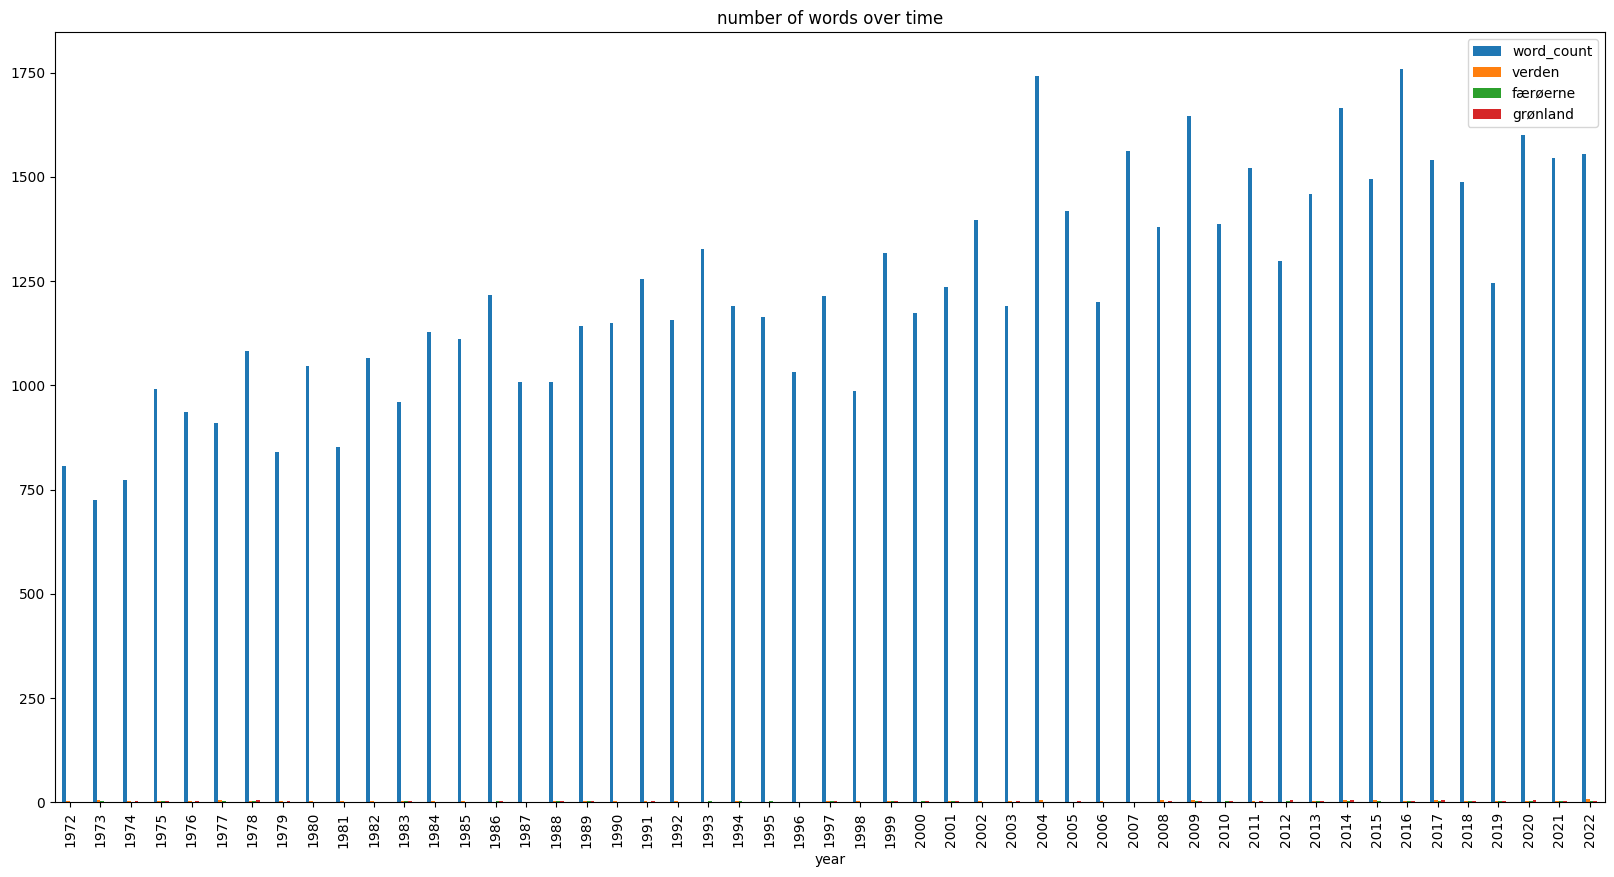

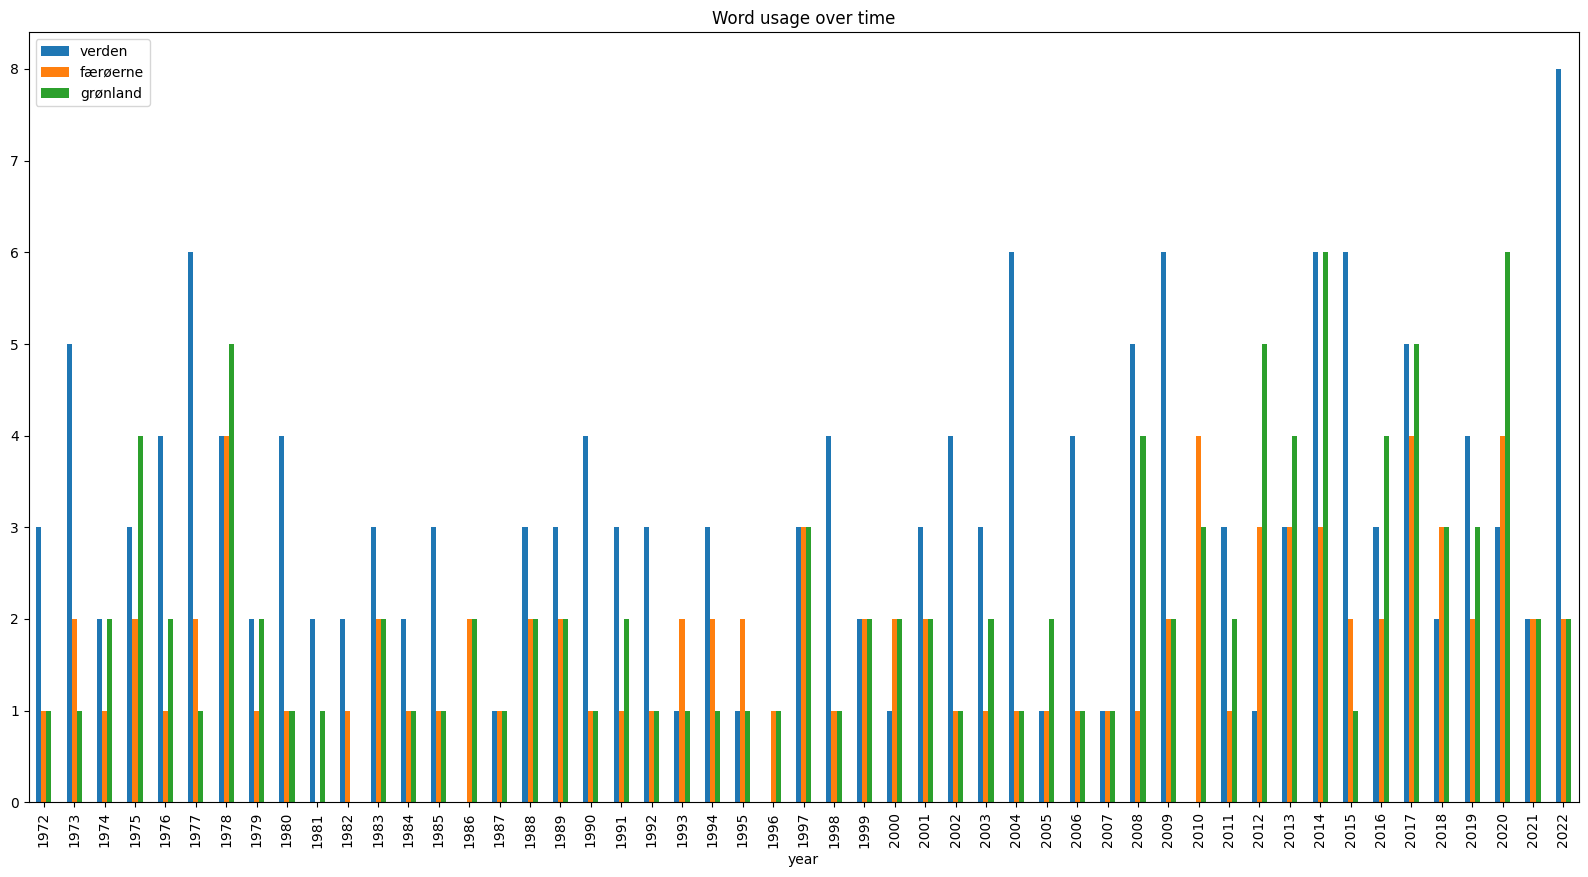

In [23]:
stopwords = "https://gist.githubusercontent.com/berteltorp/0cf8a0c7afea7f25ed754f24cfc2467b/raw/fa34ef448aff6adbb4b6bab9bda62a8b0f1ee597/stopord.txt"
stopwords = list(pd.read_csv(stopwords, header=None)[0])

# Preprocess the speeches
def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha()]  # Remove non-alphabetic tokens
    tokens = [token for token in tokens if token not in stopwords]
    return tokens

# Apply preprocessing to each speech
speeches_df['processed_speech'] = speeches_df['speech'].apply(preprocess)

# Combine all speeches into a single list of words
all_words = [word for speech in speeches_df['processed_speech'] for word in speech]

# Calculate word frequency
word_freq = Counter(all_words)

# Find the most common words
most_common_words = word_freq.most_common(50)
print(most_common_words)

# plot of number of words over time
import matplotlib.pyplot as plt
speeches_df.groupby('year').sum().plot(kind='bar', figsize=(20, 10))
# add title
plt.title('number of words over time')
plt.show()

# Count the occurrences of each word in each speech
speeches_df['verden'] = speeches_df['processed_speech'].apply(lambda x: x.count('verden'))
speeches_df['færøerne'] = speeches_df['processed_speech'].apply(lambda x: x.count('færøerne'))
speeches_df['grønland'] = speeches_df['processed_speech'].apply(lambda x: x.count('grønland'))

# Group by year and sum the counts
word_counts_by_year = speeches_df.groupby('year')[['verden', 'færøerne', 'grønland']].sum()

# Plot the counts
word_counts_by_year.plot(kind='bar', figsize=(20, 10))

# Add title and legend
plt.title('Word usage over time')
plt.legend(['verden', 'færøerne', 'grønland'])
plt.show()

## using gpt-3

In [ ]:
import openai
import os

# Load your OpenAI API key from an environment variable or direct input
openai.api_key = os.getenv('OPENAI_API_KEY')  # Replace with your OpenAI API key if not using environment variable

# Function to make a request to the OpenAI API to generate text
def generate_text_with_gpt(prompt, model='text-davinci-003', max_tokens=100):
    response = openai.Completion.create(
        engine=model,
        prompt=prompt,
        max_tokens=max_tokens,
        n=1,
        stop=None,
        temperature=0.7
    )
    return response.choices[0].text.strip()

# Combine the speeches into a single large string to form the context
# For example, concatenating last available speeches separated by a specific token (e.g., '---')
speeches_df['processed_speech'] = speeches_df['speech'].apply(lambda s: s.replace('\n', ' '))  # Replace newlines with spaces

context = ' --- '.join(speeches_df['processed_speech'][-5:])  # Using last 5 speeches for context

# Prompt the model by adding a cue for continuation at the end of the context
prompt = context + ' --- '

# Generate the text with the GPT model
generated_text = generate_text_with_gpt(prompt)

# Optional: Process the generated text to analyze frequency of predicted words
generated_words = generated_text.split()
predicted_word_freq = Counter(generated_words)

# Print out the generated text and the most common predicted words
print("Generated text continuation:")
print(generated_text)
print("\nMost common predicted words:")
print(predicted_word_freq.mostcommon()) # Adjust number as needed